In [89]:
from qiskit.circuit import ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

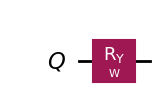

In [90]:
theta = Parameter('W') 

qr = QuantumRegister(1, 'Q')
qc = QuantumCircuit(qr)
qc.ry(theta, 0)
qc.draw('mpl')

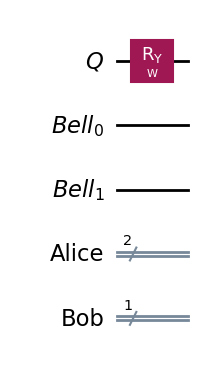

In [91]:
tele_qc = qc.copy()
bell = QuantumRegister(2, 'Bell')
alice = ClassicalRegister(2, 'Alice')
bob = ClassicalRegister(1, 'Bob')
tele_qc.add_register(bell, alice, bob)
tele_qc.draw('mpl')

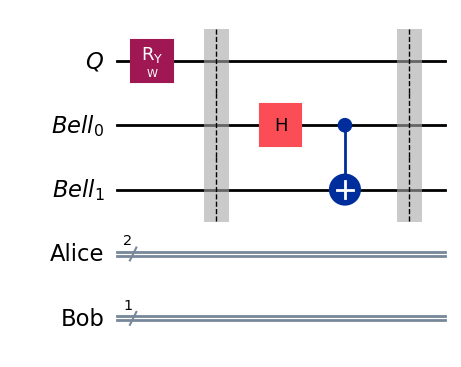

In [92]:
# create Bell state with other two qubits
tele_qc.barrier()
tele_qc.h(1)
tele_qc.cx(1, 2)
tele_qc.barrier()
tele_qc.draw('mpl')

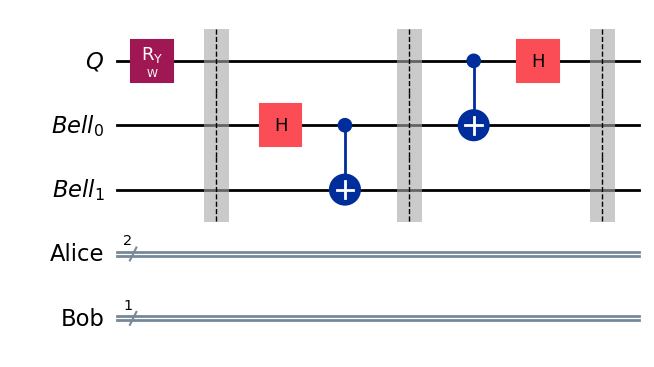

In [93]:
# alice operates on her qubits
tele_qc.cx(0, 1)
tele_qc.h(0)
tele_qc.barrier()
tele_qc.draw('mpl')

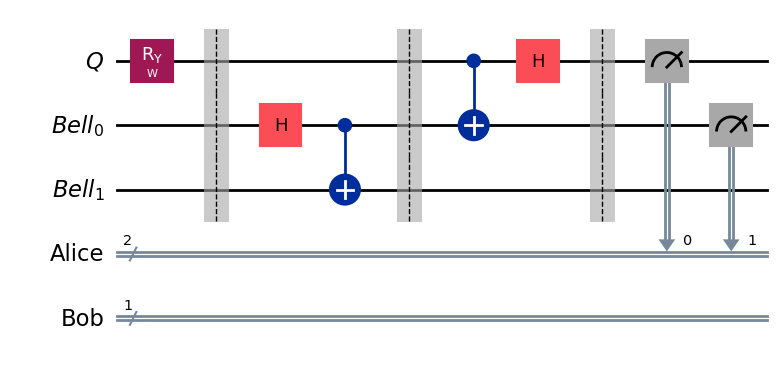

In [94]:
tele_qc.measure([qr[0], bell[0]], alice)
tele_qc.draw('mpl')

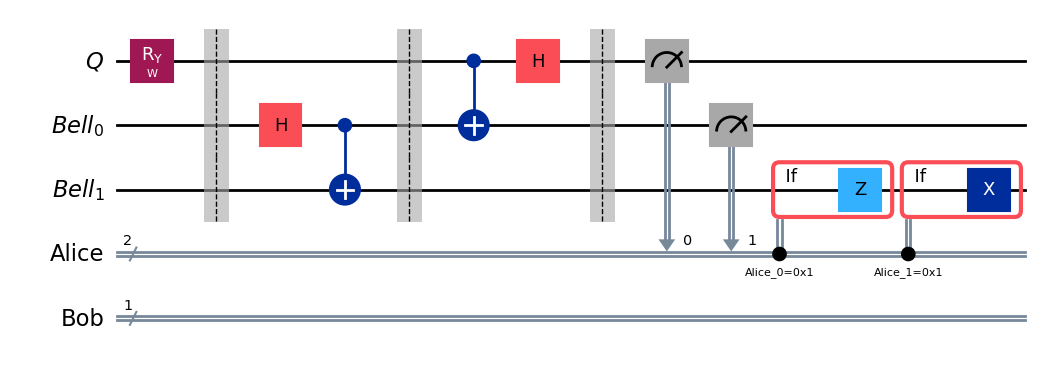

In [95]:
qc_copy = tele_qc.copy()
# add gates to qc_copy here
with qc_copy.if_test((alice[0],1)):
    qc_copy.z(2)
with qc_copy.if_test((alice[1],1)):
    qc_copy.x(2)
qc_copy.draw('mpl')


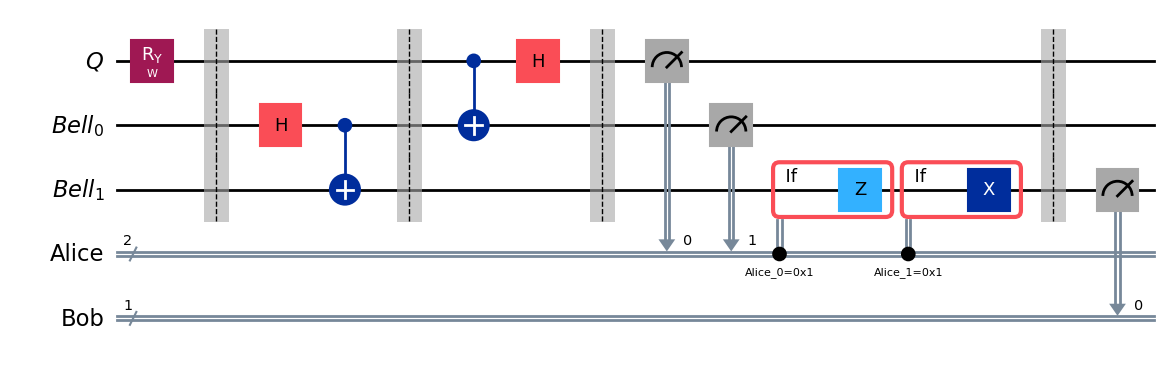

In [96]:
qc_copy.barrier()
qc_copy.measure(bell[1], bob)
qc_copy.draw('mpl')

In [97]:
from qiskit_aer.primitives import Sampler

angle = random.random() * np.pi

sampler = Sampler()
qc.measure_all()
job_static = sampler.run(qc.assign_parameters({theta: angle}))
job_dynamic = sampler.run(qc_copy.assign_parameters({theta: angle}))

print(f"Original Dists: {job_static.result().quasi_dists[0].binary_probabilities()}")
print(f"Teleported Dists: {job_dynamic.result().quasi_dists[0].binary_probabilities()}")

Original Dists: {'0': 0.7978515625, '1': 0.2021484375}
Teleported Dists: {'101': 0.046875, '011': 0.205078125, '010': 0.205078125, '000': 0.185546875, '001': 0.2041015625, '100': 0.046875, '110': 0.05859375, '111': 0.0478515625}


In [98]:
from qiskit.result import marginal_counts

tele_counts = marginal_counts(job_dynamic.result().quasi_dists[0].binary_probabilities(),[2])# marginalize counts

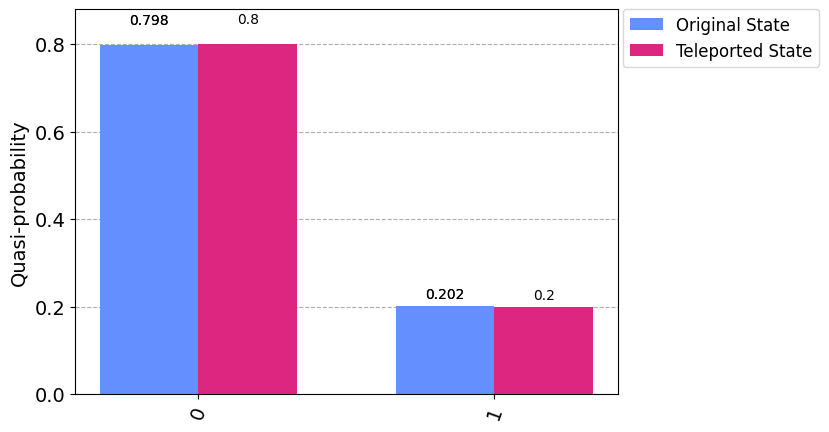

In [99]:
legend = ['Original State', 'Teleported State']
plot_histogram([job_static.result().quasi_dists[0].binary_probabilities(), tele_counts], legend=legend)